In [1]:
# Import libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r'../data/data_jobs.csv')

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [ ]:
# Assessing number of job postings in Australia and New Zealand
df_DA_counts = df[df['job_title_short'] == 'Data Analyst'].dropna(subset='salary_year_avg').groupby('job_country').size().sort_values(ascending=False)
df_DA_counts[df_DA_counts.index.isin(['Australia', 'New Zealand'])].sort_values(ascending=False)

job_country
New Zealand    9
Australia      4
dtype: int64

Due to very low numbers of data analyst job postings in Australia and New Zealand (4 and 9 postings respectively), this analysis will consider job postings from the United States

In [29]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].dropna(subset='salary_year_avg').copy()
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


In [30]:
# Exploding job_skills lists
df_DA_exploded = df_DA_US.explode('job_skills')
df_DA_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,sql,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,vba,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,tableau,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,excel,"{'analyst_tools': ['tableau', 'excel', 'altery..."


In [41]:
df_DA_skills = df_DA_exploded.groupby('job_skills')['salary_year_avg'].agg(['median', 'size']).sort_values(by='size', ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'median': 'median_salary', 'size': 'job_count'})
df_DA_skills

,median_salary,job_count
job_skills,,
sql,91000.0,2508
excel,84392.0,1808
python,97500.0,1431
tableau,92875.0,1364
sas,90000.0,926
...,...,...
theano,100000.0,1
typescript,65000.0,1
vmware,147500.0,1


In [42]:
# Find total number of job postings
tot_jobs = df_DA_US.shape[0]

# Calculate percent of job postings containing a skill
df_DA_skills['skill_percent'] = 100 * (df_DA_skills['job_count'] / tot_jobs)

df_DA_skills

,median_salary,job_count,skill_percent
job_skills,,,
sql,91000.0,2508,57.655172
excel,84392.0,1808,41.563218
python,97500.0,1431,32.896552
tableau,92875.0,1364,31.356322
sas,90000.0,926,21.287356
...,...,...,...
theano,100000.0,1,0.022989
typescript,65000.0,1,0.022989
vmware,147500.0,1,0.022989


In [47]:
# Set cut-off percent for skills to include
skill_percent = 5

# Filter for high demand skills above cut-off above
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] >= skill_percent]

df_DA_skills_high_demand

,median_salary,job_count,skill_percent
job_skills,,,
sql,91000.00,2508,57.655172
excel,84392.00,1808,41.563218
python,97500.00,1431,32.896552
tableau,92875.00,1364,31.356322
sas,90000.00,926,21.287356
r,92500.00,893,20.528736
power bi,90000.00,838,19.264368
powerpoint,85000.00,462,10.620690
word,81194.75,461,10.597701


In [ ]:

df_technology = df_DA['job_type_skills'].copy()
# print('Number of rows:', len(df_technology))

# Remove duplicate rows
df_technology = df_technology.drop_duplicates()
# print('Number of rows:', len(df_technology))

# Remove rows with empty values
df_technology = df_technology.dropna()
# print('Number of rows:', len(df_technology))

# Use skills in job_type_skills column to create new dictionary where
# key is skill classification and value is list of all skills
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict.keys():
            technology_dict[key] += value
        else:
            technology_dict[key] = value


# Remove duplicate skills by converting to set and then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['powerpoint',
  'sharepoint',
  'word',
  'sheets',
  'ssis',
  'sap',
  'visio',
  'looker',
  'cognos',
  'qlik',
  'sas',
  'power bi',
  'ssrs',
  'excel',
  'spss',
  'outlook',
  'alteryx',
  'splunk',
  'tableau',
  'microstrategy',
  'datarobot',
  'dax',
  'spreadsheet',
  'ms access'],
 'programming': ['bash',
  'fortran',
  'erlang',
  'c',
  'vba',
  'shell',
  'crystal',
  'scala',
  'visual basic',
  'nosql',
  'rust',
  'sass',
  'php',
  'python',
  'perl',
  'c++',
  'matlab',
  'mongodb',
  'no-sql',
  'sql',
  'assembly',
  'ruby',
  'css',
  'cobol',
  'sas',
  'go',
  'golang',
  'julia',
  'vb.net',
  'powershell',
  'c#',
  'mongo',
  'java',
  'swift',
  't-sql',
  'r',
  'html',
  'typescript',
  'javascript',
  'dart',
  'pascal',
  'solidity'],
 'libraries': ['matplotlib',
  'pyspark',
  'graphql',
  'kafka',
  'theano',
  'tensorflow',
  'hugging face',
  'seaborn',
  'pandas',
  'selenium',
  'hadoop',
  'electron',
  'jupyter',
  'dplyr'

In [130]:
list(technology_dict.items())

[('analyst_tools',
  ['powerpoint',
   'sharepoint',
   'word',
   'sheets',
   'ssis',
   'sap',
   'visio',
   'looker',
   'cognos',
   'qlik',
   'sas',
   'power bi',
   'ssrs',
   'excel',
   'spss',
   'outlook',
   'alteryx',
   'splunk',
   'tableau',
   'microstrategy',
   'datarobot',
   'dax',
   'spreadsheet',
   'ms access']),
 ('programming',
  ['bash',
   'fortran',
   'erlang',
   'c',
   'vba',
   'shell',
   'crystal',
   'scala',
   'visual basic',
   'nosql',
   'rust',
   'sass',
   'php',
   'python',
   'perl',
   'c++',
   'matlab',
   'mongodb',
   'no-sql',
   'sql',
   'assembly',
   'ruby',
   'css',
   'cobol',
   'sas',
   'go',
   'golang',
   'julia',
   'vb.net',
   'powershell',
   'c#',
   'mongo',
   'java',
   'swift',
   't-sql',
   'r',
   'html',
   'typescript',
   'javascript',
   'dart',
   'pascal',
   'solidity']),
 ('libraries',
  ['matplotlib',
   'pyspark',
   'graphql',
   'kafka',
   'theano',
   'tensorflow',
   'hugging face',
   'se

In [133]:
# Create dataframe from technology dictionary
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,powerpoint
0,analyst_tools,sharepoint
0,analyst_tools,word
0,analyst_tools,sheets
0,analyst_tools,ssis
...,...,...
9,async,workfront
9,async,confluence
9,async,notion
9,async,monday.com


In [ ]:
# Merge high demand skills dataframe with technology dictionary
df_plot = df_DA_skills_high_demand.merge(right=df_technology, left_on='job_skills', right_on='skills')
df_plot

,median_salary,job_count,skill_percent,technology,skills
0,91000.00,2508,57.655172,programming,sql
1,84392.00,1808,41.563218,analyst_tools,excel
2,97500.00,1431,32.896552,programming,python
3,92875.00,1364,31.356322,analyst_tools,tableau
4,90000.00,926,21.287356,analyst_tools,sas
5,90000.00,926,21.287356,programming,sas
6,92500.00,893,20.528736,programming,r
7,90000.00,838,19.264368,analyst_tools,power bi
8,85000.00,462,10.620690,analyst_tools,powerpoint
9,81194.75,461,10.597701,analyst_tools,word


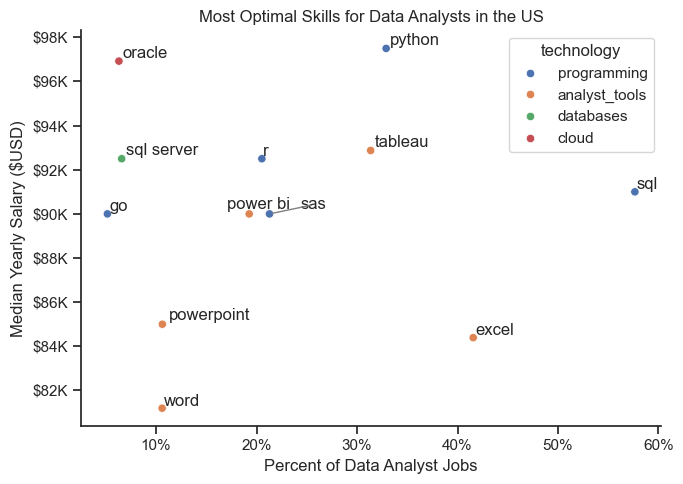

In [163]:
from adjustText import adjust_text

# df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.ylabel('Median Yearly Salary ($USD)')
plt.xlabel('Percent of Data Analyst Jobs')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

adjust_text(
    texts,
    expand_text=(1.2, 1.4),
    expand_points=(1.2, 1.4),
    arrowprops=dict(arrowstyle='-', color='gray', lw=1),
    force_text=1
)

plt.tight_layout()
plt.show()